In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import Model
from tensorflow.keras.datasets.fashion_mnist import load_data
from algorithms.ml.utils.utils import one_hot_encode
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [4]:
x_train = train_images / 255.0
x_test = test_images / 255.0

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
y_train, _ = one_hot_encode(train_labels, True)

In [10]:
y_train.shape

(60000, 10)

In [11]:
X = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

In [12]:
X.shape

(60000, 784)

In [13]:
X_test.shape

(10000, 784)

In [14]:
test_labels.shape

(10000,)

In [15]:
layer_size = 1
input_shape = X.shape
dropout_rates = [1.0]
layers = [128]
output_labels = ['mnist']
y = {'mnist': y_train}
output_activations = {'mnist':'softmax'}
activations = ['relu']
output_heads = [10]

In [16]:
model = Model(input_shape, layers, activations, dropout_rates,
              output_heads=output_heads,output_labels=output_labels,
              output_activations=output_activations)

Layers ............... Trainable Params
Dense1 ............... 100480
Dense2 ............... 1290
Total  ............... 101770
Memory ............... 814160 bytes (795 KB) (0.776 MB)


In [17]:
learning_rate = 2e-3
decay=False
normalized = False
bias = False
batch_size = 1000
optimizer = 'adam'

In [18]:
model.fit(X, y,
          learning_rate=learning_rate, epochs=14,
          normalized=normalized,
            optimizer=optimizer, 
          decay=decay, bias=bias,
          batch_size=batch_size, 
          verbose=False)

In [54]:
test_predictions = model.predict(X_test, batch_size)
test_predictions = test_predictions['mnist']
test_predictions = np.argmax(test_predictions, axis=0)

In [20]:
predictions.shape

(10000,)

In [21]:
predictions.shape

(10000,)

In [56]:
accuracy_score(test_labels, test_predictions)

0.8687

In [23]:
costs = np.array(model.costs)
costs.shape

(154,)

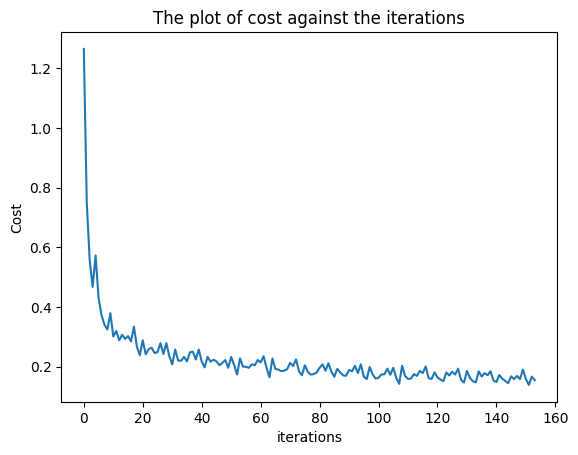

In [24]:
plt.plot(np.arange(len(model.iterations)), costs)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();

In [25]:
predictions = model.predict(X, batch_size)
predictions = predictions['mnist']
predictions = np.argmax(predictions, axis=0)

In [26]:
accuracy_score(train_labels, predictions)

0.8896

In [27]:
#model.save('fashion_mnist_model.pkl')

In [28]:
#loaded_model = model.load('fashion_mnist_model.pkl')

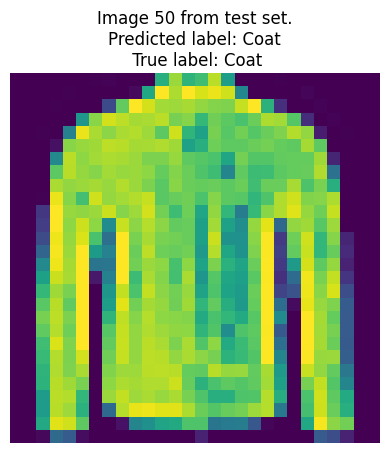

In [52]:
index = 50
image = test_images[index]
img = image.reshape(1, -1)
img_pred = model.predict(img, -1)
img_pred = img_pred['mnist']
img_pred = np.argmax(img_pred, axis=0).squeeze()
plt.imshow(image)
plt.title(f'Image {index} from test set.\nPredicted label: {class_names[img_pred]}\n True label: {class_names[test_labels[index]]}')
plt.axis('off')
plt.show();

In [61]:
len(test_labels[test_predictions == test_labels])

8687

In [62]:
len(test_labels[test_predictions != test_labels])

1313